Do not expect this code to win any competition... It is quick and dirty, not efficient or scalable

In [29]:
import networkx as nx
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

In [41]:
def spherical_metric(x, y):
    """
    We assume the vectors x and y are from the usual sphere (norm 1 vectors). 
    Then we just compute the angle between them.
    """
    theta = np.arccos( np.dot(x,y) )  # You could use the operator @ instead of np.dot if your python is >= 3.6
    return theta

points = np.array([
    [np.cos(i/8*np.pi)*np.cos(j/4*np.pi), np.cos(i/8*np.pi)*np.sin(j/4*np.pi), np.sin(i/8*np.pi)]
        for i in range(-3,4) for j in range(-4,4)
])
points = np.vstack([[0, 0, -1], points, [0, 0, 1]])  # I do not want multple instances of the same point... nothing would change


In [46]:
distances = spatial.distance.pdist(points, spherical_metric)
distance_matrix = spatial.distance.squareform(distances)

You know that the changes in the complexes appears when two (or more points) are exactly at the distance given by the parameter... Hence, It is a good idea to compute those critical values

In [55]:
# I am rounding the values of the distances to 5 decimal places... 
# Check out want happens if you do not do that below in the critical_radii variable
# As you can see there are lots of similar values... those correspond to numerical errors... 
# It can be a good idea to clean this mess up (round the values)... 
# In the real world you will not have this option... 

critical_radii = sorted(set([ np.ceil(x*1e5)/1e5 for x in distances if x <= np.pi/4]))
critical_radii

[0.29396, 0.3927, 0.54803, 0.56494, 0.72274, 0.74876, 0.7854]

We are ready to compute the complexes... I will use some facts about the complexes... they are Flag complexes... So, instead of making a nice algorithm I will use some cool features of networkx package to compute the things form me... Again, the code is far form fancy

In [56]:
complexes = {
    # We always start with the complex given by points... 
    # (if there is repetitions this will be wrong!)... we could add 0 to the radii but...
    # On the other hand, the last complex is a contractible one (one single high-dimensional simplex)
}
for r in critical_radii:
    adj_matrix = (distance_matrix <= r)
    G = nx.from_numpy_array(adj_matrix) # The 1-skeleton
    complexes[r] = list(nx.enumerate_all_cliques(G))

In [57]:
complexes.keys()

dict_keys([0.29396, 0.3927, 0.54803, 0.56494, 0.72274, 0.74876, 0.7854])

In [58]:
[len(x) for k,x in complexes.items()]

[74, 154, 234, 378, 586, 698, 1742]

Let us visualize those complexes... only up to dimension 3! I'm using matplotlib (or ayavi after)

In [103]:
rgb[:,1,:-1]

array([[0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.74556604, 0.        , 0.19061154],
       [0.

<IPython.core.display.Javascript object>


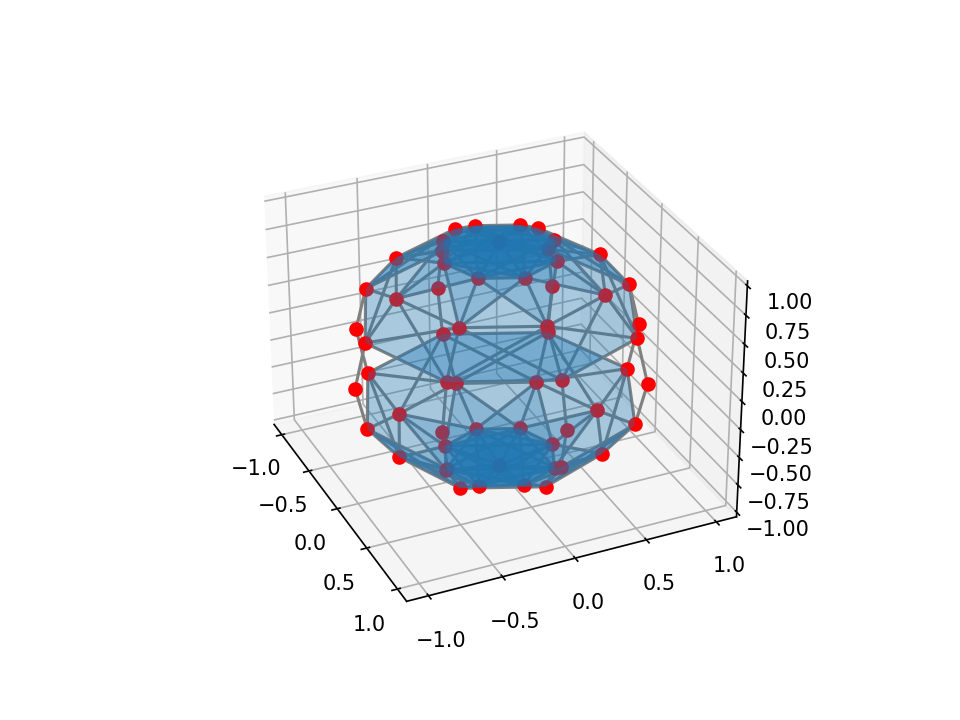

/tmp/ipykernel_54524/1352585308.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [108]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

WHICH_COMPLEX = 0.74876

fig = plt.figure()
ax = fig.gca(projection='3d')

triangles = [points[s] for s in complexes[WHICH_COMPLEX] if len(s) == 3]
# Shade data, creating an rgb array.

ax.add_collection3d(Poly3DCollection(triangles, alpha=.2, linewidth=10))

for e in complexes[WHICH_COMPLEX]:
    if len(e) == 2:
        ax.plot(*points[e].transpose(), c="gray")
ax.plot(*points.transpose(), 'o', c="r")

plt.show()


In [66]:
import numpy as np
from mayavi import mlab
from matplotlib.colors import LightSource

WHICH_COMPLEX = 0.74876

## Mayavi
objs = [
    mlab.points3d(*points.transpose(), scale_factor=0.1, color=(1,1,0))
]
triangles = [s for s in complexes[WHICH_COMPLEX] if len(s) == 3]
if triangles:
    objs.append(mlab.triangular_mesh(*points.transpose(), triangles, color=(1,0,0)) ,)
    
for e in complexes[WHICH_COMPLEX]:
    if len(e) == 2:
        objs.append(mlab.plot3d(*points[e].transpose()))

# Change the visualization parameters.
for e in objs:
    e.actor.property.interpolation = 'phong'
    e.actor.property.specular = 0.1
    e.actor.property.specular_power = 5

plt.show()
mlab.show()

## Other version using dionysus

In [24]:
import dionysus as dio
import numpy as np
from scipy import spatial

def spherical_metric(x, y):
    """
    We assume the vectors x and y are from the usual sphere (norm 1 vectors). 
    Then we just compute the angle between them.
    """
    theta = np.arccos( np.dot(x,y) )  # You could use the operator @ instead of np.dot if your python is >= 3.6
    return theta

points = np.array([
    [np.cos(i/8*np.pi)*np.cos(j/4*np.pi), np.cos(i/8*np.pi)*np.sin(j/4*np.pi), np.sin(i/8*np.pi)]
        for i in range(-3,4) for j in range(-4,4)
])
points = np.vstack([[0, 0, -1], points, [0, 0, 1]])  # I do not want multple instances of the same point... nothing would change


In [62]:
F = dio.fill_rips(points, 9, 0.7854) # points, dimension, max dist
F

Filtration with 1742 simplices